In [41]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## Linear Regression for Univariate Analysis

In [42]:
!kaggle datasets download andonians/random-linear-regression

Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression
License(s): other
random-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
with ZipFile("random-linear-regression.zip", "r") as obj:
    obj.extractall()

In [44]:
dataTrain = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")

In [45]:
dataTrain.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [46]:
dataTest.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [47]:
dataTrain['y'].isna().sum()

1

In [48]:
dataTrain_cleaned = dataTrain.dropna(subset=['y'])
x = dataTrain_cleaned['x'].values.reshape(-1, 1)
y = dataTrain_cleaned['y'].values  


In [49]:
model = LinearRegression()
model.fit(x, y)
predictions = model.predict(x)

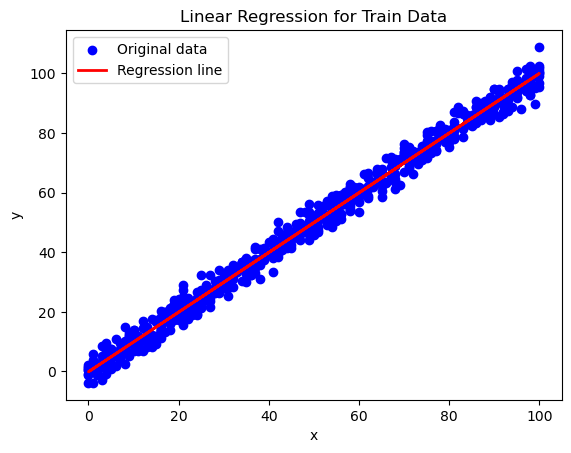

In [50]:
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, predictions, color='red', linewidth=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression for Train Data')
plt.legend()
plt.show()

In [51]:
y_pred = model.predict(dataTest['x'].values.reshape(-1,1))
y_test = dataTest['y'].values.reshape(-1,1)
r2_score(y_pred, y_test)

0.9883666162358453

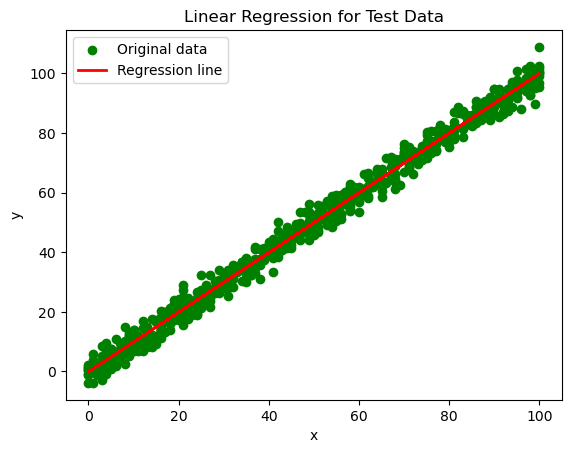

In [54]:
plt.scatter(x, y, color='green', label='Original data')
plt.plot(x, predictions, color='red', linewidth=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression for Test Data')
plt.legend()
plt.savefig("Univariate Regression")
plt.show()


### R2 Score = 98.83

## Linear Regression for Multivariate Analysis

In [34]:
#!/bin/bash
!kaggle datasets download quantbruce/real-estate-price-prediction

Dataset URL: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction
License(s): other
real-estate-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
with ZipFile("real-estate-price-prediction.zip", "r") as obj:
    obj.extractall()

In [36]:
data = pd.read_csv("Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [37]:
x = data.drop(columns=['No', 'Y house price of unit area'], axis=1)
y = data['Y house price of unit area']

In [38]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [40]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.6810580555095946

### R2 Score = 68.10